In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Fig03.tif',0)
#s = np.zeros_like(img, dtype=np.int32)

In [13]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(540, 466), dtype=uint8)

In [3]:
def min_val(window):
    return np.min(window)
def max_val(window):
    return np.max(window)
def median_value(window):
    return np.median(window)

def filters(img, size, filter_name):
    step = size // 2
    padded_img = np.pad(img, pad_width=step, mode='constant', constant_values=0)
    new_img = np.zeros_like(img)
    if img is None:
        raise ValueError("Image is not loaded properly. Check the file path.")
    row, col = new_img.shape
    for i in range(step, row-step):
        for j in range(step, col-step):
            window = padded_img[i:i+size, j:j+size]
            if filter_name == 'min':
                new_img[i, j] = min_val(window)
            elif filter_name == 'max':
                new_img[i, j] = max_val(window)
            elif filter_name == 'median':
                new_img[i, j] = median_value(window)
    return new_img

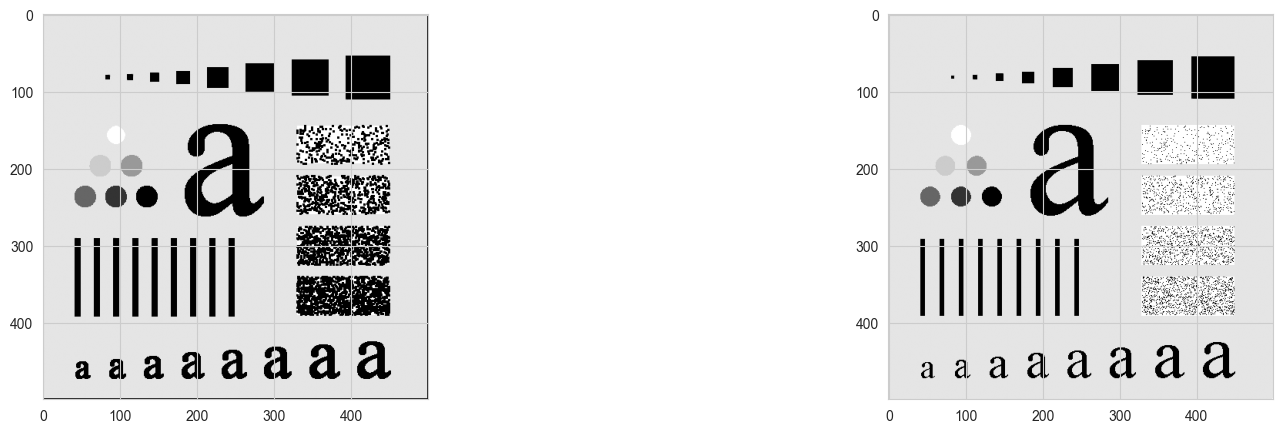

In [4]:

median_img = filters(img, 3, "min")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].imshow(median_img, cmap='gray')
axes[1].imshow(img, cmap='gray')
plt.show()

In [15]:
def magnitude(img_x, img_y):
    magnitude = np.zeros_like(img_x, np.float64)
    magnitude = np.sqrt(img_x**2 + img_y**2)
    return magnitude
def angles(x, y):
    return np.degrees(np.arctan2(y, x))
def sobel_filter(img):
    sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    img_x = np.zeros_like(img, np.float64)
    img_y = np.zeros_like(img, np.float64)
    for i in range(1, img.shape[0]-2):
      for j in range(1, img.shape[1]-2):
        window = padded_img[i-1:i+2, j-1:j+2]
        img_x[i-1, j-1] = np.sum(window * sobel_x)
        img_y[i-1, j-1] = np.sum(window * sobel_y)
    return img_x, img_y

In [6]:
sobel_x, sobel_y = sobel_filter(img)

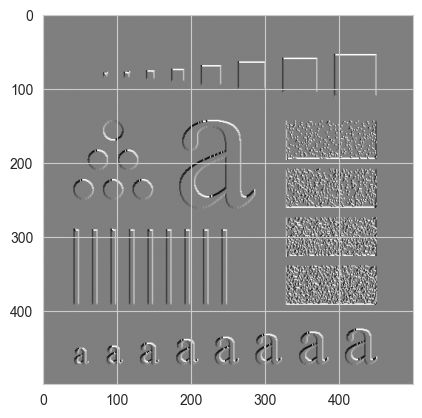

In [17]:
magnitude_img = magnitude(sobel_x, sobel_y)
phase_img = angles(sobel_x, sobel_y)
plt.imshow(phase_img, cmap='gray')

In [9]:
def laplacian(img):
    lap_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img, np.float64)

    for i in range(1, img.shape[0]-2):
      for j in range(1, img.shape[1]-2):
        window = padded_img[i-1:i+2, j-1:j+2]
        new_img[i-1, j-1] = np.sum(window * lap_filter)
    return new_img

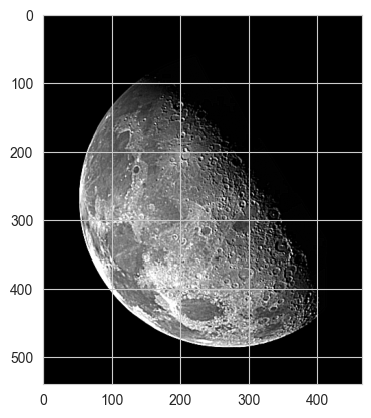

In [14]:
lap_img = laplacian(img)
new_img = np.add(lap_img, img)
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)
plt.imshow(new_img, cmap='gray')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
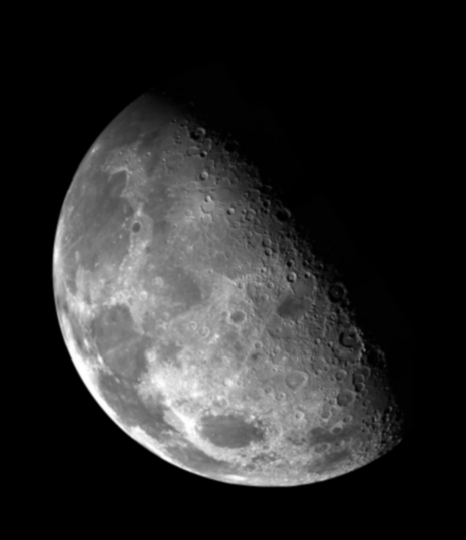

In [ ]:
img